## Importando as bibliotecas

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve, correlate

## Suavização e amostragem

In [33]:
def downsample(img):
    '''Gera uma nova imagem com metade do tamanho da imagem de entrada. A imagem de
       entrada é suavizada utilizando um filtro gaussiano e amostrada a cada 2 pixels'''
    # Filtro gaussiano
    gauss_filt = np.array([[1,  4,  6,  4, 1],
                           [4, 16, 24, 16, 4],
                           [6, 24, 36, 24, 6],
                           [4, 16, 24, 16, 4],
                           [1,  4,  6,  4, 1]])
    gauss_filt = gauss_filt/256.
    
    img = img.astype(float)
    num_rows, num_cols = img.shape
    half_num_rows = (num_rows+1)//2
    half_num_cols = (num_cols+1)//2
    
    img_smooth = convolve(img, gauss_filt, mode='same')
    img_down = np.zeros([half_num_rows,half_num_cols])
    for row in range(half_num_rows):
        for col in range(half_num_cols):
            img_down[row, col] = img_smooth[2*row, 2*col]
            
    return img_down

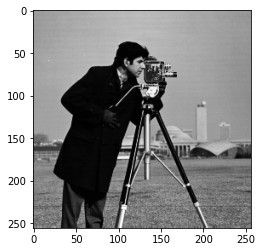

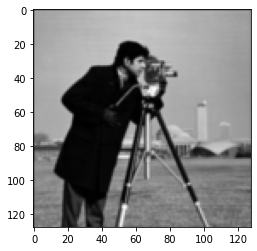

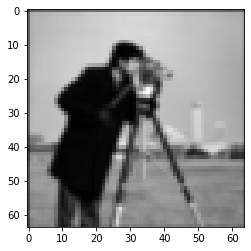

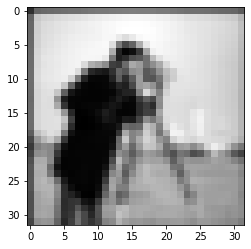

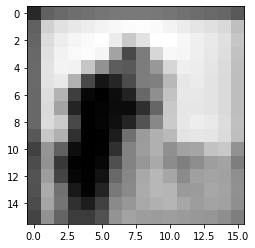

In [34]:
img = plt.imread('cameraman.tiff')

img_2x = downsample(img)
img_4x = downsample(img_2x)
img_8x = downsample(img_4x)
img_16x = downsample(img_8x)

plt.figure()
plt.imshow(img, 'gray')
plt.figure()
plt.imshow(img_2x, 'gray')
plt.figure()
plt.imshow(img_4x, 'gray')
plt.figure()
plt.imshow(img_8x, 'gray')
plt.figure()
plt.imshow(img_16x, 'gray')

## Interpolação bicúbica

In [35]:
def upsample_2x(img, filt):

    num_rows, num_cols = img.shape
    img_upsampled = np.zeros([2*num_rows, 2*num_cols])
    for row in range(num_rows):
        for col in range(num_cols):
            img_upsampled[2*row, 2*col] = img[row, col]

    signal_interp = correlate(img_upsampled, filt, mode='same')
    
    return signal_interp

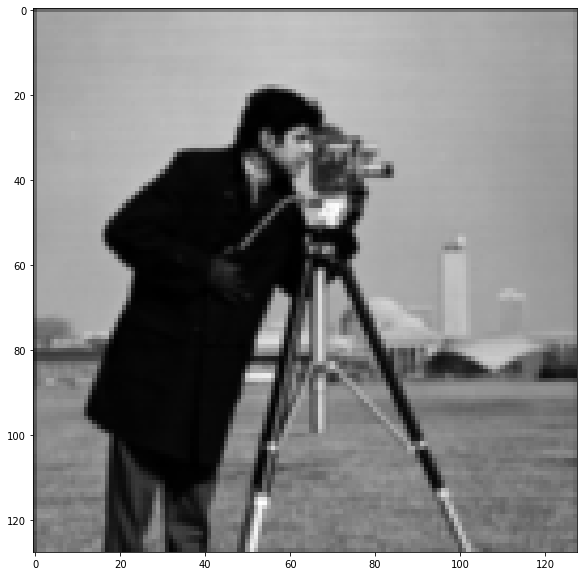

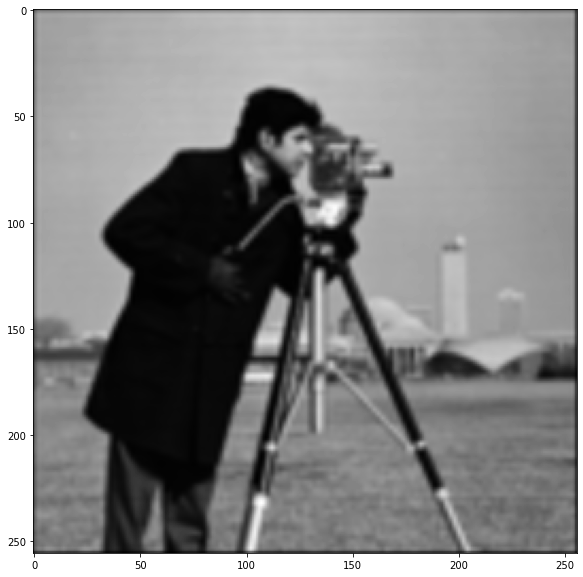

In [36]:
w_c = np.array([[-0.0625, 0, 0.5625, 1, 0.5625, 0, -0.0625]])
w_c2d = np.dot(w_c.T, w_c)

img_up2 = upsample_2x(img_2x, w_c2d)

plt.figure(figsize=(10,10))
plt.imshow(img_2x, 'gray')
plt.figure(figsize=(10,10))
plt.imshow(img_up2, 'gray')
plt.show()

## Subtraindo as imagens

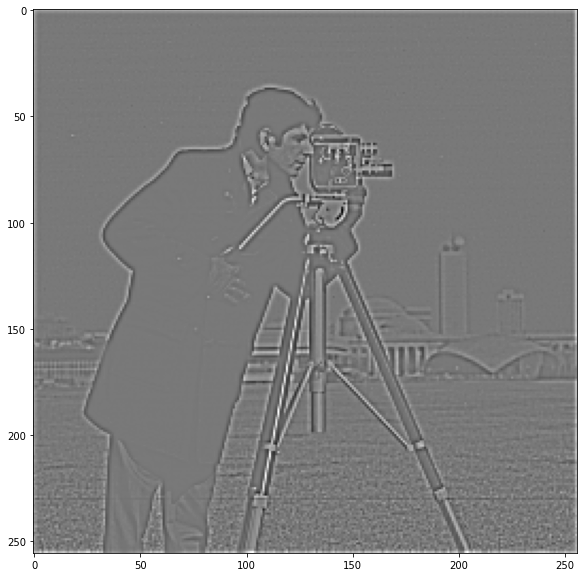

In [37]:
img3 = img - img_up2

plt.figure(figsize=(10,10))
plt.imshow(img3, 'gray')
plt.show()


## Retornando a imagem original

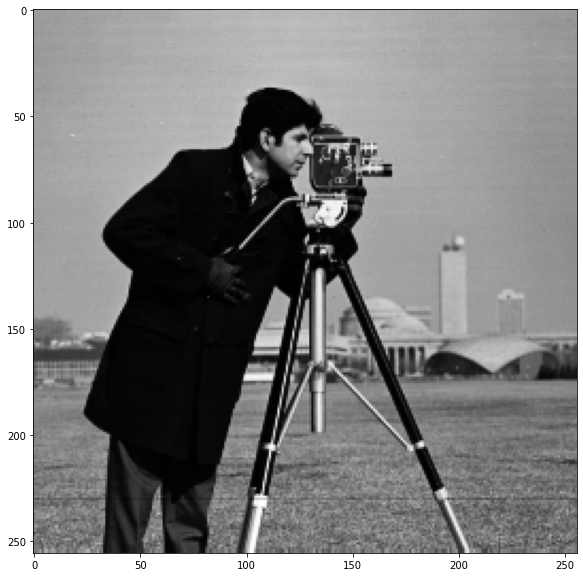

In [38]:
img4 = img_up2 + img3

plt.figure(figsize=(10,10))
plt.imshow(img4, 'gray')
plt.show()

## Pirâmide Laplaciana

## Apagando alguns níveis

## Misturando duas imagens